<a href="https://colab.research.google.com/github/harilakshman-333/Chatbot_Using_NLTK/blob/main/AI_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
The number of rental bikes out for rent at each hour (column Rented Bike count), together
with other features such as the hour of the day, the date, humidity, and so on.
Aim is to :
 - to build a model to predict the number of rental bikes out at each hour
 - Regression Models are used, namely KNN and a regression model
 - RMS, MSE and R2 are the metrics used for measuring the performance of the models
 - A dummy regressor has been used for baseline comparison.

# 0. Preliminaries
We firstly import NumPy and matplotlib as we will be using these throughout the worksheet. We use a 'magic' function `%matplotlib inline` to display plots in the worksheet.

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

%matplotlib inline

# 1. Regression

Using sklearn to fit a KNN and a Ridge regression model.  Then to evaluate the models we need to calculate the Root mean square error, mean squared error and a function to calculate $r^2$.

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
#importing pandas and accessing the data which has been stored in the drive.
import pandas as pd
path = '/content/drive/MyDrive/Bristol materials/Intro To AI/coursework_other.csv'
df = pd.read_csv(path, encoding= 'unicode_escape')
df.head() #checking out the data features.

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [113]:
#To analyse and eliminate the non integer and non float type datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## 1.1 Plot the data on named axes (Visualization)

In [114]:
import plotly.express as px
fig = px.line(df, x = 'Date', y = 'Rented Bike Count', title='Bike Counts')
fig.show()

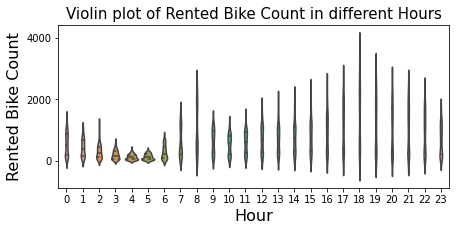

In [115]:
import seaborn as sns
hour=df['Hour']
RBC= df['Rented Bike Count']
fig = plt.figure(figsize=(7,3))
sns.violinplot(x=hour, y=RBC, inner='quartile')

plt.title('Violin plot of Rented Bike Count in different Hours', fontsize=15)
plt.rc('font',size=16)
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Rented Bike Count', fontsize=16)
 
plt.show()

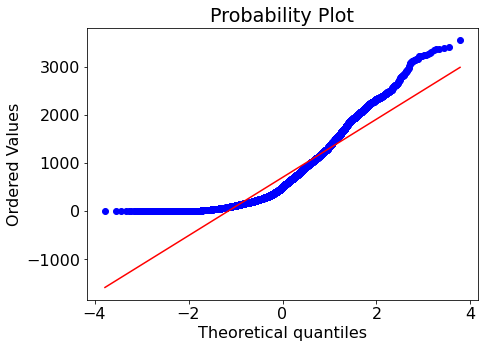

In [116]:
import scipy
from scipy import stats
#Normal plot
fig=plt.figure(figsize=(7,5))
stats.probplot(RBC.tolist(),dist='norm',plot=plt)
plt.show()

Eliminating the non integer and non float datatypes, namely Seasons, Holidays and Functioning Day and projecting the rest.

In [117]:
data=df.drop(columns=['Seasons','Holiday','Functioning Day'],axis=1)
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


1.2 Checking out the correlation of the hour data.

In [118]:
corr=data.corr()
corr['Hour'].sort_values(ascending=False)
a=corr['Hour'].sort_values(ascending=False)
a.values

array([ 1.        ,  0.41025729,  0.28519666,  0.14513092,  0.12411449,
        0.09875348,  0.00871464,  0.00305437, -0.02151645, -0.24164379])

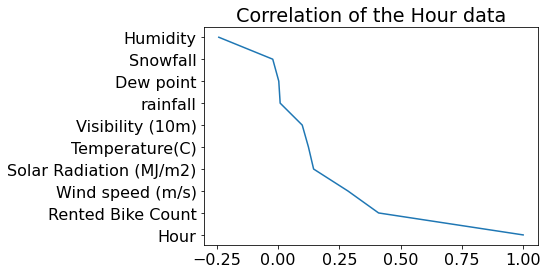

In [119]:
#hour data and other feature's co-relations
plt.title('Correlation of the Hour data')
c=["Hour","Rented Bike Count","Wind speed (m/s)","Solar Radiation (MJ/m2)","Temperature(C)","Visibility (10m)","rainfall","Dew point","Snowfall","Humidity"]           
plt.plot(a,c)


1.3 Feature Extraction

In [120]:
X=data.drop(columns=['Rented Bike Count','Date'],axis=1)#feature extraction
Y=data['Rented Bike Count'] #Label

1.4 Splitting data into train and test

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state=0)

In [122]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

dummy_reg=DummyRegressor()
dummy_reg.fit(X_train,y_train)
dummy_pred=dummy_reg.predict(X_test)
print("RMSE",np.sqrt(mean_squared_error(y_test,dummy_pred)))
print("MAE of the model",mean_absolute_error(y_test,dummy_pred))
print("R2 score",r2_score(y_test,dummy_pred))

RMSE 645.9706626574654
MAE of the model 522.559847375993
R2 score -0.00040361467048000144


In [123]:
from sklearn.linear_model import LinearRegression
LNR=LinearRegression().fit(X_train,y_train)
y_pred=LNR.predict(X_test)

In [124]:
resid = y_test - y_pred
LNR.score(X_test,y_test)

0.4581599173956813

In [125]:
# Root Mean Squared Error
RMSE = np.sqrt(np.mean(resid**2))
print('The Root Mean Squared Error is',RMSE)
print()

# Mean Absolute Error
MAE = np.mean(np.abs(resid))
print('The Mean Absolute Error is',MAE)
print()

#Rsquared
R2 = r2_score(y_test, y_pred)
print('The Rsquared value is',R2)

The Root Mean Squared Error is 475.4017026720801

The Mean Absolute Error is 352.78434165815116

The Rsquared value is 0.4581599173956813


# Decision Tree



In [126]:
from sklearn.tree import DecisionTreeRegressor
# Create Decision Tree Regressor object
regr_tree = DecisionTreeRegressor(max_depth=6)

# Train the model using the train data
regr_tree.fit(X_train, y_train)

# Use the model to predict the test data
y_pred_tree = regr_tree.predict(X_test)

# Form residual
resid_tree = y_test - y_pred_tree

In [127]:
# Root Mean Squared Error
RMSE_tree = np.sqrt(np.mean(resid_tree**2))
print('The Root Mean Squared Error is',RMSE_tree)
print()

# Mean Absolute Error
MAE_tree = np.mean(np.abs(resid_tree))
print('The Mean Absolute Error is',MAE_tree)
print()

#Rsquared
R2_tree = r2_score(y_test, y_pred_tree)
print('The Rsquared value is',R2_tree)

The Root Mean Squared Error is 388.6835192483247

The Mean Absolute Error is 243.7886999164256

The Rsquared value is 0.6378054461667491


**DT-HYPER PARAMETER TUNING**

In [128]:
dt = DecisionTreeRegressor(random_state=42)

In [210]:
# Create the parameter grid based on the results of random search 
params = {
  'max_depth': [ 70,100,120,150,200],
    'min_samples_leaf': [30,40, 50, 100, 150, 200],
    'criterion': [ "friedman_mse","poisson"],
    'splitter' : ["random"]
}


In [211]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "r2", return_train_score=True )

In [212]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


GridSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'poisson'],
                         'max_depth': [70, 100, 120, 150, 200],
                         'min_samples_leaf': [30, 40, 50, 100, 150, 200],
                         'splitter': ['random']},
             return_train_score=True, scoring='r2', verbose=1)

In [213]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_splitter,params,split0_test_score,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.011964,0.004267,0.005580,0.003067,friedman_mse,70,30,random,"{'criterion': 'friedman_mse', 'max_depth': 70,...",0.661521,...,0.649551,0.652035,0.006618,1,0.658919,0.662339,0.661396,0.686639,0.667323,0.011222
1,0.010314,0.001600,0.005203,0.002304,friedman_mse,70,40,random,"{'criterion': 'friedman_mse', 'max_depth': 70,...",0.652207,...,0.617130,0.635906,0.013292,6,0.626982,0.663923,0.649013,0.648120,0.647009,0.013157
2,0.010457,0.002213,0.004008,0.000319,friedman_mse,70,50,random,"{'criterion': 'friedman_mse', 'max_depth': 70,...",0.650818,...,0.580568,0.610059,0.029952,11,0.625571,0.650809,0.606075,0.602504,0.621240,0.019197
3,0.010449,0.002981,0.008322,0.004932,friedman_mse,70,100,random,"{'criterion': 'friedman_mse', 'max_depth': 70,...",0.609505,...,0.533146,0.554696,0.032906,16,0.596293,0.562752,0.533494,0.569676,0.565554,0.022347
4,0.009335,0.003613,0.003559,0.000358,friedman_mse,70,150,random,"{'criterion': 'friedman_mse', 'max_depth': 70,...",0.492713,...,0.470203,0.473590,0.013296,36,0.482767,0.470305,0.495100,0.495235,0.485852,0.010305


In [214]:
grid_search.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=70,
                      min_samples_leaf=30, random_state=42, splitter='random')

In [215]:
dt_best = grid_search.best_estimator_

In [216]:
def evaluate_model(dt_regressor):
    print("Train Accuracy :", r2_score(y_train, dt_regressor.predict(X_train)))
    
    print("-"*50)
    print("Test Accuracy :", r2_score(y_test, dt_regressor.predict(X_test)))
    

In [217]:
evaluate_model(dt_best)


Train Accuracy : 0.6852533940513443
--------------------------------------------------
Test Accuracy : 0.6284961257463615
